In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from skimpy import skim

import re

In [2]:


# Informations de connexion à la base de données RDS
endpoint = 'database-datacoders.c3m48simgdzn.eu-west-3.rds.amazonaws.com'
username = 'admin'
password = 'dataCoders2024+'
database_name = 'db_datacoders'
port = 3306  # Le port par défaut pour MySQL est 3306

# Création de la connexion
conn = mysql.connector.connect(
    host=endpoint,
    user=username,
    passwd=password,
    database=database_name,
    port=port
)

# Création d'un curseur
cursor = conn.cursor()

# Exemple d'exécution d'une requête SQL
cursor.execute('''
               SELECT * 
               FROM user_info as ui
               LEFT JOIN login_user as lu USING (id_login_user)
               LEFT JOIN mentor_sujet as ms ON (lu.id_login_user = ms.id_mentor)
               LEFT JOIN mentorat as mt ON (mt.id_mentorat = ms.id_mentorat)
               LEFT JOIN sujet as sj ON (lu.id_login_user = sj.id_utilisateur_mentoret)
               LEFT JOIN calendrier as c ON (lu.id_login_user = c.id_utilisateur_mentoret)
               ''')
rows = cursor.fetchall()

# # Affichage des résultats
# for row in rows[:20]:
#     print(row)



column_names = [desc[0]+str(i) for desc, i in zip(cursor.description, range(len(cursor.description)))]
print(column_names)

# Création du DataFrame pandas avec noms de colonnes préfixés par les noms des tables
# column_names_prefixed = [f"{table}_{column}" if table else column for table, column in zip(table_names, column_names)]
df = pd.DataFrame(rows, columns=column_names)

# Fermeture du curseur et de la connexion
cursor.close()
conn.close()


# enregistrer au format parquet
df.to_parquet('user_info.parquet', index=False)

['id_login_user0', 'id_user_info1', 'prenom2', 'nom3', 'sexe4', 'age5', 'mentor6', 'lgbt7', 'handicap8', 'type_handicap9', 'niveau_professionnel10', 'categorie_socio_professionnelle11', 'nombre_de_participation12', 'id_mentorat13', 'email14', 'mot_de_passe15', 'created_at16', 'last_connection_at17', 'id_mentor18', 'id_mentorat19', 'id_mentorat20', 'type_mentorat21', 'id_sujet22', 'id_mentorat23', 'id_utilisateur_mentor24', 'id_utilisateur_mentoret25', 'sujet_du_mentorat26', 'created_at27', 'updated_at28', 'id_utilisateur_mentor29', 'id_utilisateur_mentoret30', 'id_mentorat31', 'created_at32', 'updated_at33']


In [3]:
df = pd.read_parquet(r'C:\Users\dimle\Documents\clone_repo\HackathonWCS\ML\user_info.parquet')

df

,id_login_user0,id_user_info1,prenom2,nom3,sexe4,age5,mentor6,lgbt7,handicap8,type_handicap9,...,id_utilisateur_mentor24,id_utilisateur_mentoret25,sujet_du_mentorat26,created_at27,updated_at28,id_utilisateur_mentor29,id_utilisateur_mentoret30,id_mentorat31,created_at32,updated_at33
0,2798,1,Chris,Kate,Other,2000,0,Yes,1,moteur,...,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1,1798,1798,Marvin,Harrison,Genderfluid,59,0,No,0,None,...,NaN,NaN,None,NaT,NaT,2285.0,1798.0,3.0,2024-07-04 14:15:58,2024-07-04 14:15:58
2,1799,1799,Tammy,Scott,Transgender Female,32,1,Yes,0,None,...,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
3,1800,1800,Adam,Bates,Genderqueer,23,1,No,1,Visuel,...,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
4,1801,1801,Heather,Waters,Female,56,0,Yes,0,None,...,NaN,NaN,None,NaT,NaT,2720.0,1801.0,5.0,2024-07-04 14:15:58,2024-07-04 14:15:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2794,2794,Mark,Miller,Female,61,1,No,0,None,...,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1536,2795,2795,Christopher,Graves,Non_binary,53,0,No,1,Physique,...,NaN,NaN,None,NaT,NaT,2103.0,2795.0,2.0,2024-07-04 14:15:58,2024-07-04 14:15:58
1537,2796,2796,Richard,Orozco,Intersex,39,1,Yes,1,Physique,...,NaN,NaN,None,NaT,NaT,NaN,NaN,NaN,NaT,NaT
1538,2797,2797,Timothy,Scott,Non_binary,30,0,Yes,0,None,...,NaN,NaN,None,NaT,NaT,2036.0,2797.0,2.0,2024-07-04 14:15:58,2024-07-04 14:15:58


In [4]:
pd.set_option("display.max_columns", None)

In [5]:
# clean du df pour le ML
df.drop(columns=[
                 'id_user_info1', 
                 'id_mentorat19',	
                 'email14',	
                 'mot_de_passe15',	
                 'id_mentorat20',
                 'created_at27',	
                 'created_at32',	
                 'updated_at33',
                  'id_utilisateur_mentor29',	
                  'id_utilisateur_mentoret30',	
                  'id_mentorat31',
                  'id_mentorat23'	,
                  'id_utilisateur_mentor24',
                  'id_utilisateur_mentoret25'
                  
                 ], inplace=True)

In [6]:
df

,id_login_user0,prenom2,nom3,sexe4,age5,mentor6,lgbt7,handicap8,type_handicap9,niveau_professionnel10,categorie_socio_professionnelle11,nombre_de_participation12,id_mentorat13,created_at16,last_connection_at17,id_mentor18,type_mentorat21,id_sujet22,sujet_du_mentorat26,updated_at28
0,2798,Chris,Kate,Other,2000,0,Yes,1,moteur,chomage,None,NaN,NaN,2024-07-04 14:16:28,2024-07-04 14:16:28,NaN,None,NaN,None,NaT
1,1798,Marvin,Harrison,Genderfluid,59,0,No,0,None,Actif,Employé,6.0,3.0,2024-07-04 14:15:33,2024-07-04 14:15:33,NaN,None,NaN,None,NaT
2,1799,Tammy,Scott,Transgender Female,32,1,Yes,0,None,Jeune diplômé,Ouvrier,14.0,1.0,2024-07-04 14:15:33,2024-07-04 14:15:33,1799.0,mentorat pour membre lgbt+,NaN,None,NaT
3,1800,Adam,Bates,Genderqueer,23,1,No,1,Visuel,Senior,Agriculteur,13.0,3.0,2024-07-04 14:15:33,2024-07-04 14:15:33,1800.0,mentorat pour jeune diplomé ou étudiant,NaN,None,NaT
4,1801,Heather,Waters,Female,56,0,Yes,0,None,Senior,Sans activité professionnelle,13.0,3.0,2024-07-04 14:15:34,2024-07-04 14:15:34,NaN,None,NaN,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2794,Mark,Miller,Female,61,1,No,0,None,Senior,Artisan,15.0,5.0,2024-07-04 14:15:57,2024-07-04 14:15:57,2794.0,mentorat interculturel,NaN,None,NaT
1536,2795,Christopher,Graves,Non_binary,53,0,No,1,Physique,Senior,Employé,14.0,1.0,2024-07-04 14:15:57,2024-07-04 14:15:57,NaN,None,NaN,None,NaT
1537,2796,Richard,Orozco,Intersex,39,1,Yes,1,Physique,Étudiant,Étudiant,20.0,4.0,2024-07-04 14:15:57,2024-07-04 14:15:57,2796.0,mentorat interculturel,NaN,None,NaT
1538,2797,Timothy,Scott,Non_binary,30,0,Yes,0,None,Jeune diplômé,Artisan,7.0,1.0,2024-07-04 14:15:57,2024-07-04 14:15:57,NaN,None,NaN,None,NaT


In [7]:
# remplacement desq oui par Yes
df['lgbt7'] = df['lgbt7'].apply(lambda x: 0 if x =='No' else 1 )

In [8]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1540   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 20     │ │ int32       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                │ datetime64  │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50  ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ id_login_user0         │     0 │      0 │    2303 │   285.2 │  1798 │  2065 │ 2294 │  2546 │ 2798 │ ▇▇▇▇▇▇ │  │
│ │ age5                   │     0 │      0 │   41.85 │   51.82 │    18 │    29 │   39 │    52 │ 2000 │   ▇    │  │
│ │ mentor6                │     0 │      0 │  0.4481 │  0.4975 │     0 │     0 │    0 │     1 │    1 │ ▇    ▆ │  │
│ │ lgbt7                  │     0 │      0 │  0.5045 │  0.5001 │     0 │     0 │    1 │     1 │    1 │ ▇    ▇ │  │
│ │ handicap8              │     0 │      0 │  0.5039 │  0.5001 │     0 │     0 │    1 │     1 │    1 │ ▇    ▇ │  │
│ │ nombre_de_participatio │     1 │   0.06 │   9.694 │   6.216 │     0 │     4 │   10 │    15 │   20 │ ▇▆▅▇▅▇ │  │
│ │ n12                    │       │        │         │         │       │       │      │       │      │        │  │
│ │ id_mentorat13          │     1 │   0.06 │   2.992 │   1.415 │     1 │     2 │    3 │     4 │    5 │ ▇▇ ▇▇▇ │  │
│ │ id_mentor18            │  1040 │  67.53 │    2318 │   291.3 │  1799 │  2082 │ 2308 │  2583 │ 2796 │ ▆▆▇▆▇▇ │  │
│ │ id_sujet22             │  1086 │  70.52 │   152.6 │   87.25 │     1 │ 78.25 │  155 │ 227.8 │  300 │ ▇▇▆▇▇▇ │  │
│ └────────────────────────┴───────┴────────┴─────────┴─────────┴───────┴───────┴──────┴───────┴──────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA    ┃ NA %    ┃ first                   ┃ last                   ┃ frequency  ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ created_at16             │     0 │       0 │   2024-07-04 14:15:33   │  2024-07-04 14:16:28   │ None       │  │
│ │ last_connection_at17     │     0 │       0 │   2024-07-04 14:15:33   │  2024-07-04 14:16:28   │ None       │  │
│ │ updated_at28             │  1086 │   70.52 │   2024-07-04 14:15:58   │  2024-07-04 14:15:58   │ None       │  │
│ └──────────────────────────┴───────┴─────────┴─────────────────────────┴────────────────────────┴────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━

In [9]:
# nettoyage des doublons
df = df[~df.duplicated()] 

In [10]:
# suppression NA pour id_login_user0

df = df.dropna(subset=['id_login_user0'])

In [11]:
# remplacement des NA pour les idmentor si mentor = false alors 99999

df['id_mentor18'] = df['id_mentor18'].fillna(99999)
df['id_mentorat13'] = df['id_mentorat13'].fillna(99999)
df['id_sujet22'] = df['id_sujet22'].fillna(99999)


In [12]:
df['type_handicap9'] = df['type_handicap9'].fillna('')
df['type_mentorat21'] = df['type_mentorat21'].fillna('')

In [13]:
# modification des totre de colonne pour sup le chiffre

df.rename(columns=lambda x: re.sub(r'\d+$', '', x),
          inplace=True)


In [14]:
# transformation des bool
df['lgbt'] = df['lgbt'].astype(bool)
df['mentor'] = df['mentor'].astype(bool)
df['handicap'] = df['handicap'].astype(bool)

In [15]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1208   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 3     │                                                          │
│                                │ datetime64  │ 3     │                                                          │
│                                │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id_login_user          │   0 │     0 │   2301 │  287.1 │ 1798 │   2055 │   2298 │   2547 │   2798 │ ▇▇▇▇▇▇ │  │
│ │ age                    │   0 │     0 │  42.32 │  58.08 │   18 │     29 │     39 │     53 │   2000 │   ▇    │  │
│ │ nombre_de_participatio │   1 │  0.08 │  9.787 │  6.174 │    0 │      4 │     10 │     15 │     20 │ ▇▆▅▇▅▇ │  │
│ │ n                      │     │       │        │        │      │        │        │        │        │        │  │
│ │ id_mentorat            │   0 │     0 │  85.74 │   2877 │    1 │      2 │      3 │      4 │ 100000 │   ▇    │  │
│ │ id_mentor              │   0 │     0 │  62560 │  47510 │ 1799 │   2485 │ 100000 │ 100000 │ 100000 │ ▅    ▇ │  │
│ │ id_sujet               │   0 │     0 │  75200 │  43160 │    1 │ 100000 │ 100000 │ 100000 │ 100000 │ ▃    ▇ │  │
│ └────────────────────────┴─────┴───────┴────────┴────────┴──────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mentor                             │             653 │                          0.54 │       ▇    ▇        │  │
│ │ lgbt                               │             603 │                           0.5 │       ▇    ▇        │  │
│ │ handicap                           │             605 │                           0.5 │       ▇    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %    ┃ first                   ┃ last                    ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━

In [16]:
df

,id_login_user,prenom,nom,sexe,age,mentor,lgbt,handicap,type_handicap,niveau_professionnel,categorie_socio_professionnelle,nombre_de_participation,id_mentorat,created_at,last_connection_at,id_mentor,type_mentorat,id_sujet,sujet_du_mentorat,updated_at
0,2798,Chris,Kate,Other,2000,False,True,True,moteur,chomage,None,NaN,99999.0,2024-07-04 14:16:28,2024-07-04 14:16:28,99999.0,,99999.0,None,NaT
1,1798,Marvin,Harrison,Genderfluid,59,False,False,False,,Actif,Employé,6.0,3.0,2024-07-04 14:15:33,2024-07-04 14:15:33,99999.0,,99999.0,None,NaT
2,1799,Tammy,Scott,Transgender Female,32,True,True,False,,Jeune diplômé,Ouvrier,14.0,1.0,2024-07-04 14:15:33,2024-07-04 14:15:33,1799.0,mentorat pour membre lgbt+,99999.0,None,NaT
3,1800,Adam,Bates,Genderqueer,23,True,False,True,Visuel,Senior,Agriculteur,13.0,3.0,2024-07-04 14:15:33,2024-07-04 14:15:33,1800.0,mentorat pour jeune diplomé ou étudiant,99999.0,None,NaT
4,1801,Heather,Waters,Female,56,False,True,False,,Senior,Sans activité professionnelle,13.0,3.0,2024-07-04 14:15:34,2024-07-04 14:15:34,99999.0,,99999.0,None,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2794,Mark,Miller,Female,61,True,False,False,,Senior,Artisan,15.0,5.0,2024-07-04 14:15:57,2024-07-04 14:15:57,2794.0,mentorat pour jeune diplomé ou étudiant,99999.0,None,NaT
1535,2794,Mark,Miller,Female,61,True,False,False,,Senior,Artisan,15.0,5.0,2024-07-04 14:15:57,2024-07-04 14:15:57,2794.0,mentorat interculturel,99999.0,None,NaT
1536,2795,Christopher,Graves,Non_binary,53,False,False,True,Physique,Senior,Employé,14.0,1.0,2024-07-04 14:15:57,2024-07-04 14:15:57,99999.0,,99999.0,None,NaT
1537,2796,Richard,Orozco,Intersex,39,True,True,True,Physique,Étudiant,Étudiant,20.0,4.0,2024-07-04 14:15:57,2024-07-04 14:15:57,2796.0,mentorat interculturel,99999.0,None,NaT


In [17]:
#observation des categorie

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].nunique())
        print()  # Print a new line for better readability



Value counts for column 'prenom':
337

Value counts for column 'nom':
494

Value counts for column 'sexe':
10

Value counts for column 'type_handicap':
7

Value counts for column 'niveau_professionnel':
5

Value counts for column 'categorie_socio_professionnelle':
10

Value counts for column 'type_mentorat':
6

Value counts for column 'sujet_du_mentorat':
65



In [18]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric (object type)
        print(f"Value counts for column '{col}':")
        print(df[col].unique())
        print()

Value counts for column 'prenom':
['Chris' 'Marvin' 'Tammy' 'Adam' 'Heather' 'Susan' 'Gerald' 'Desiree'
 'Richard' 'Hannah' 'Megan' 'Matthew' 'Randy' 'Stephanie' 'Robert' 'Tanya'
 'Gordon' 'Andrew' 'Amy' 'Samantha' 'Vincent' 'Lisa' 'Wayne' 'Derek'
 'Kimberly' 'Elizabeth' 'Dillon' 'Paula' 'Philip' 'Connie' 'Rebecca'
 'Michael' 'Ivan' 'Cathy' 'Allison' 'Juan' 'Kyle' 'Christopher'
 'Christian' 'Heidi' 'Morgan' 'Whitney' 'Mike' 'Cameron' 'Stephen' 'James'
 'Pamela' 'Roy' 'Rose' 'Chelsea' 'Darrell' 'Nicole' 'Mark' 'Gabrielle'
 'Lydia' 'Chase' 'Sara' 'Laura' 'Dawn' 'Erika' 'Wendy' 'Stanley' 'Annette'
 'Daniel' 'Ryan' 'Phillip' 'Brittney' 'Bruce' 'Joanna' 'Jennifer' 'Eric'
 'David' 'Christine' 'Linda' 'Breanna' 'Janice' 'Monique' 'Benjamin'
 'Nancy' 'Jared' 'John' 'Justin' 'Katie' 'Scott' 'Jason' 'Deborah'
 'Gabriel' 'Natalie' 'Jill' 'Frank' 'Madison' 'Gary' 'Nathan' 'Brett'
 'Catherine' 'Jonathan' 'Sheri' 'Tanner' 'Katherine' 'Mary' 'Patricia'
 'Joseph' 'Marc' 'Nicholas' 'Veronica' 'Monica' 

In [19]:
dict_clean = {}


for col in df.columns:
    if df[col].dtype == 'object':
        dict_clean[col] = df[col].value_counts()

C:\Users\dimle\AppData\Local\Temp\ipykernel_10156\952662843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_10156\952662843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_10156\952662843.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
C:\Users\dimle\AppData\Local\Temp\ipykernel_10156\952662843.py:12: UserWarning: set_ticklabels() should only 

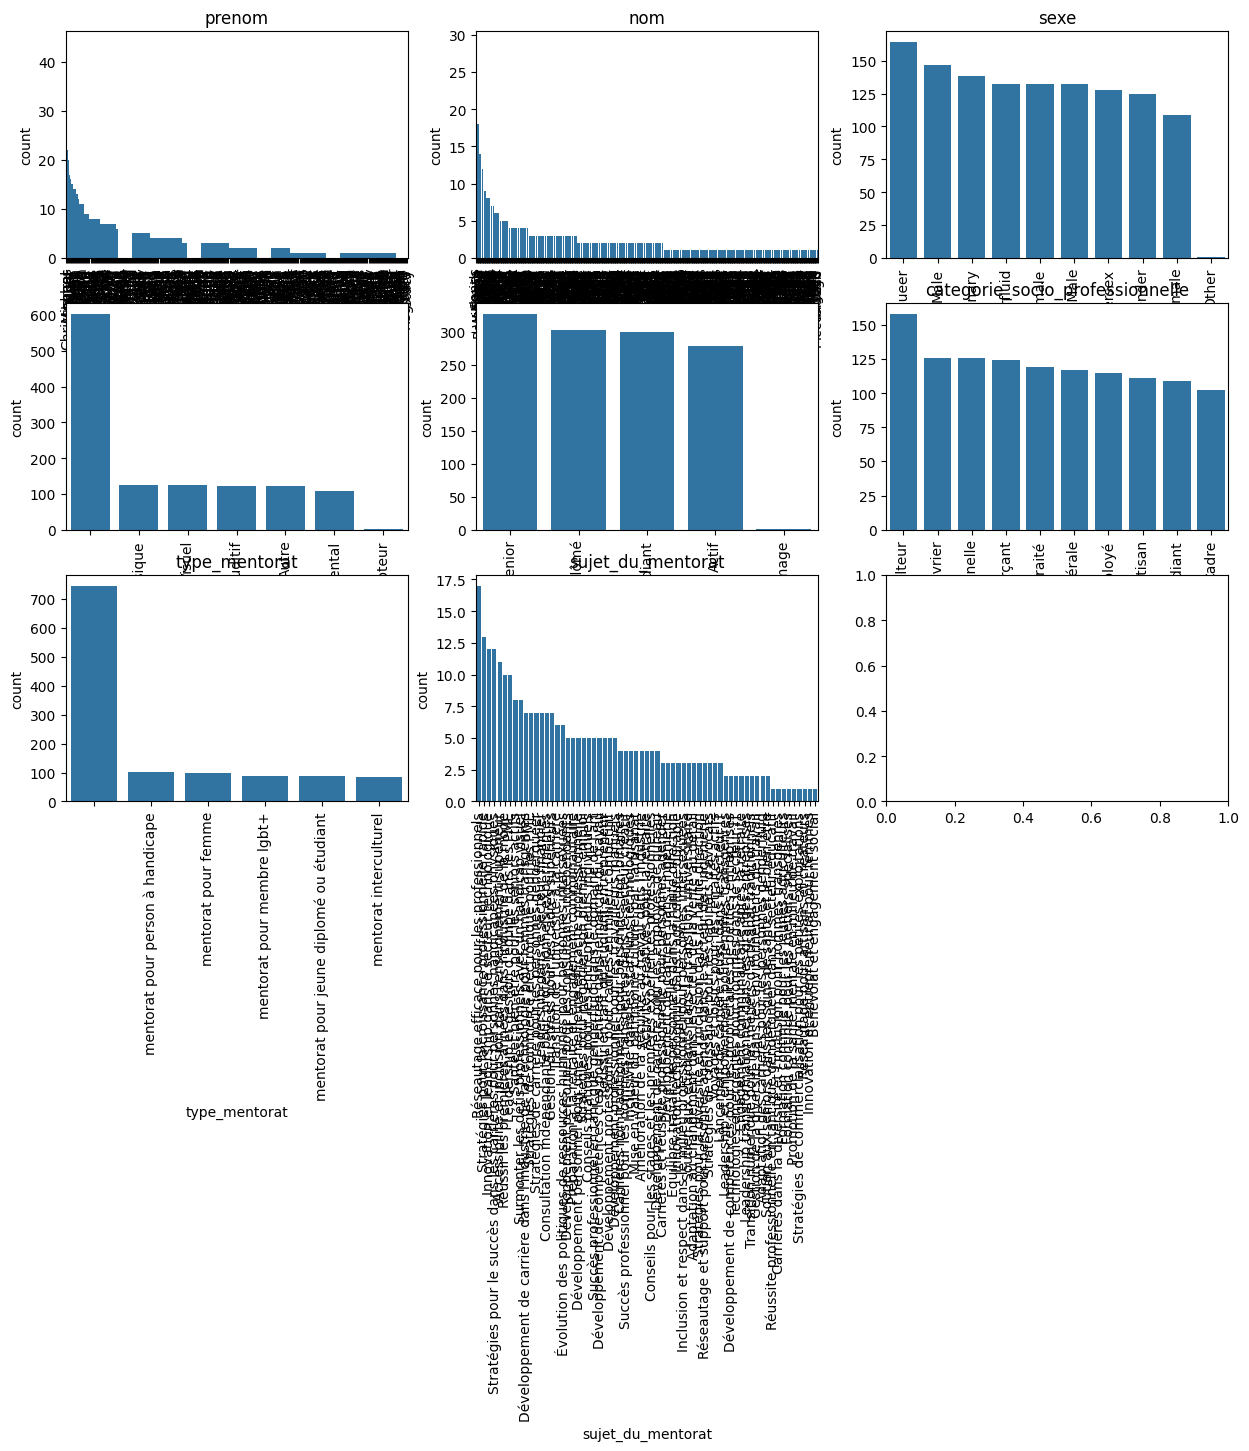

In [22]:
i= 0
nb_col = 3
nb_lig = 3
colonne = df.columns

fig, axes = plt.subplots(nb_lig, nb_col, figsize=(15,10))

for k, v in dict_clean.items():
    sns.barplot(dict_clean[k], ax= axes[i//nb_col, i%nb_col])
    axes[i//nb_col, i%nb_col].set_title(k)
    axes[i//nb_col, i%nb_col].set_ylabel('count')
    axes[i//nb_col, i%nb_col].set_xticklabels(axes[i//nb_col, i%nb_col].get_xticklabels(), rotation=90)
    i += 1


plt.tight_layout()
plt.show()

In [23]:
df.select_dtypes(include='bool').columns

Index(['mentor', 'lgbt', 'handicap'], dtype='object')

In [24]:
df.select_dtypes(include=['object','number']).columns

Index(['id_login_user', 'prenom', 'nom', 'sexe', 'age', 'type_handicap',
       'niveau_professionnel', 'categorie_socio_professionnelle',
       'nombre_de_participation', 'id_mentorat', 'id_mentor', 'type_mentorat',
       'id_sujet', 'sujet_du_mentorat'],
      dtype='object')

In [25]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1208   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 3     │                                                          │
│                                │ datetime64  │ 3     │                                                          │
│                                │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ id_login_user          │   0 │     0 │   2301 │  287.1 │ 1798 │   2055 │   2298 │   2547 │   2798 │ ▇▇▇▇▇▇ │  │
│ │ age                    │   0 │     0 │  42.32 │  58.08 │   18 │     29 │     39 │     53 │   2000 │   ▇    │  │
│ │ nombre_de_participatio │   1 │  0.08 │  9.787 │  6.174 │    0 │      4 │     10 │     15 │     20 │ ▇▆▅▇▅▇ │  │
│ │ n                      │     │       │        │        │      │        │        │        │        │        │  │
│ │ id_mentorat            │   0 │     0 │  85.74 │   2877 │    1 │      2 │      3 │      4 │ 100000 │   ▇    │  │
│ │ id_mentor              │   0 │     0 │  62560 │  47510 │ 1799 │   2485 │ 100000 │ 100000 │ 100000 │ ▅    ▇ │  │
│ │ id_sujet               │   0 │     0 │  75200 │  43160 │    1 │ 100000 │ 100000 │ 100000 │ 100000 │ ▃    ▇ │  │
│ └────────────────────────┴─────┴───────┴────────┴────────┴──────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ mentor                             │             653 │                          0.54 │       ▇    ▇        │  │
│ │ lgbt                               │             603 │                           0.5 │       ▇    ▇        │  │
│ │ handicap                           │             605 │                           0.5 │       ▇    ▇        │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name             ┃ NA   ┃ NA %    ┃ first                   ┃ last                    ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━

In [26]:
# enregistrement du df clean en parquet
df.to_parquet('Big_One_table_clean.parquet', index=False)

## Génération de graph python